In [1]:
%load_ext autoreload
%autoreload 2
from storytelling import *

In [21]:
yesemite = "/Users/jiayao/Work/Storytelling/src/dat/232.csv.gz"
df = pd.read_csv(yesemite)
df.shape

(270736, 12)

In [22]:
df.head(2)

,id,text,created_at,retweet_count,user_id,user_followers_count,rt_id,rt_text,rt_created_at,rt_retweet_count,rt_user_id,rt_user_followers_count
0,377270914217689088,RT @JohnKingCNN: Top house GOP aide of #Syria ...,Tue Sep 10 03:22:49 +0000 2013,3,758064577,5,3.771974e+17,Top house GOP aide of #Syria vote delay bc of ...,Mon Sep 09 22:30:42 +0000 2013,3.0,30043495.0,317664.0
1,377270943904960512,RT @marcylauren: Five Republicans Who Flipped ...,Tue Sep 10 03:22:57 +0000 2013,12,558251172,12268,3.772704e+17,Five Republicans Who Flipped To ‘No’ On Syria ...,Tue Sep 10 03:20:40 +0000 2013,12.0,16146535.0,31360.0


In [23]:
dt = df[df["rt_id"].isna()]
print(dt.shape)
dt.head(2)

(151016, 12)


,id,text,created_at,retweet_count,user_id,user_followers_count,rt_id,rt_text,rt_created_at,rt_retweet_count,rt_user_id,rt_user_followers_count
4,377270837276966912,this could be a real #funny parody on #syria's...,Tue Sep 10 03:22:31 +0000 2013,0,44380040,269,NaN,NaN,NaN,NaN,NaN,NaN
7,377270992805957632,also. RT @QueenRave_ If we go to war with Syri...,Tue Sep 10 03:23:08 +0000 2013,0,30157077,7654,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
rt = df[~df["rt_id"].isna()]

Text(0, 0.5, 'frequency')

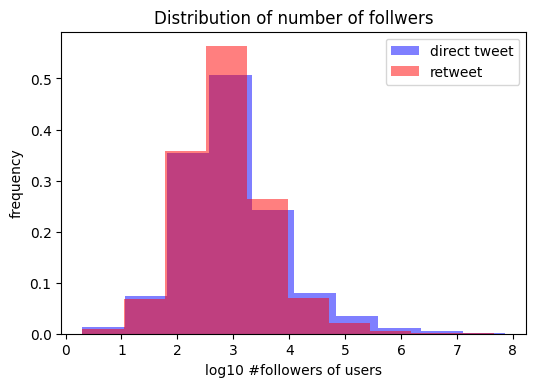

In [28]:
#df[df["user_followers_count"].hist()
df = df[df["user_followers_count"]>1]
rt = rt[rt["user_followers_count"]>1]
follower1 = np.log10(df["user_followers_count"].values)
follower2 = np.log10(rt["user_followers_count"].values)
plt.figure(dpi=100)
plt.title("Distribution of number of follwers")
plt.hist(follower1, density=1, color="blue", label="direct tweet", alpha=0.5)
plt.hist(follower2, density=1, color="red", label="retweet", alpha=0.5)
plt.xlabel("log10 #followers of users")
plt.legend()
plt.ylabel("frequency")

In [ ]:
df2 = df[df["user_followers_count"]<10]

In [8]:
for i, row in df2.iterrows():
    print(row["text"])
    print()

BULLSHIT - - - http://t.co/TVBEmjQPOJ

Pres. Obama Continues Syria Push with Network Interviews http://t.co/lpPCYpi5AI via @sharethis

@RepBradWenstrup Please ask about an exit plan.  What happens if Syria uses chemical weapons again - will the US bomb again?

Bitch ass Obama was put in his place!  Hows that Reset between Russua and USA Going EH? LOL http://t.co/su99w4jSDS

Obama says strikes on hold if Syria quits chemical arms

Syria's chemical arsenal at a glance

#mediator Syria to dispose of chemical weapons? http://t.co/uYoTHTwEwr

Tell Obama: Stay out of Syria! - The Ron Paul Channel http://t.co/6sNGaYUO75 via @sharethis

@AdmiralMarkets hoe wud u see usd today after obama agreed to Russian plan on Syria? $

@BreitbartNews wait?!? I thought they had chemical weapons?!? Is Obama schizophrenic or is his forked tongue out of control?

Any military strike on Syria will kill more children. DO NOT attack the children.  Find a peacefull and civilized solution to the problem

Obama Push

NBC News and NY Times report President Obama agress to UN-led discussion on Russia’s proposal for Syria’s chemical weapons.

Syria backs chemical weapons plan: Meantime, it bombs rebels for the first time since the West threatened mili... http://t.co/g7amjOiXWC

What will presidents Obama speech be? 
 This will be an important decision.

CNN reports France and U.K. agree with President Obama to explore Russian plan for Syria’s chemical weapons.

POLITCO reports President Obama told senators on Capitol  Hill that he wants to delay a vote on authorizing force in Syria.

@WhiteHouse  PRESIDENT OBAMA IN UR SPEECH TONIGHT MAKE SURE U R FIRM AND STERN

Since Pres. Putin fixed The Syria problem for Obama maybe he can fix Obamacare for Obama Because Obama can't fix anything

@jorgeramosnews. the President Obama's speech. It is important that we know his approach in order to see where  Immigration Reform stands.

Obama to Congress on Syria: Give it time and don’t undermine the process

For Puti

In [9]:
df1 = df[df["user_followers_count"]>10**5]
df1 = df1.reset_index()
df1.shape

(6869, 13)

In [10]:
df1.head(2)

,index,id,text,created_at,retweet_count,user_id,user_followers_count,rt_id,rt_text,rt_created_at,rt_retweet_count,rt_user_id,rt_user_followers_count
0,33,377270881279422464,Obama's accidental diplomacy http://t.co/MaBju...,Tue Sep 10 03:22:42 +0000 2013,25,9300262,4058686,NaN,NaN,NaN,NaN,NaN,NaN
1,158,377271257231663104,Senate delays Syria vote as Obama loses moment...,Tue Sep 10 03:24:11 +0000 2013,0,21363569,104389,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
DC = TwitterCleaner()

In [12]:
Data = []
for i,row in df1.iterrows():
    Data.append(DC.Clean(df1.loc[i, "text"]))
DC.corpusWC(Data, "4884.1gram.wc.txt")

In [13]:
vocabularies = pd.read_csv("4884.1gram.wc.txt", names=["Word", "Count"], delimiter="\t")["Word"].values[:400]
#vocabularies
BW = DC.BagOfWords(Data, vocabularies)
print(BW.shape)

(6869, 400)


(6869, 80)


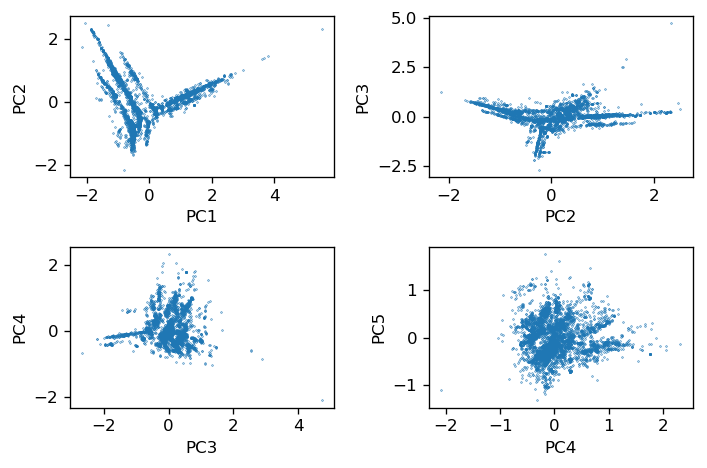

In [14]:
pca = PCA(n_components=80, svd_solver='arpack')
X = pca.fit_transform(BW)
print(X.shape)
fig, axs = plt.subplots(2,2,dpi=120)
for i,(j,k) in enumerate([(0,0),(0,1),(1,0),(1,1)]):
    axs[j,k].scatter(X[:,i], X[:,i+1], s=0.1)
    axs[j,k].set_xlabel("PC%d"%(i+1))
    axs[j,k].set_ylabel("PC%d"%(i+2))
fig.tight_layout()
plt.show()

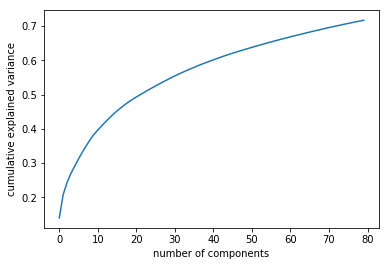

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [16]:
tsne = TSNE(n_components=2)
Y = tsne.fit_transform(X[:, :80])

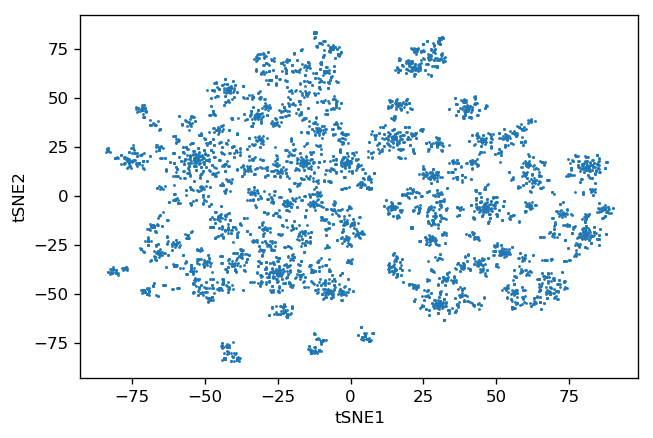

In [17]:
fig = plt.figure(dpi=120)
ax = plt.subplot(111)
ax.scatter(Y[:,0], Y[:,1],s=0.5)
ax.set_xlabel("tSNE1")
ax.set_ylabel("tSNE2")
plt.show()

In [18]:
Agg = sklearn.cluster.AgglomerativeClustering(n_clusters=40)
clusters = Agg.fit_predict(Y)
groups = AssignCluster(Y, clusters)

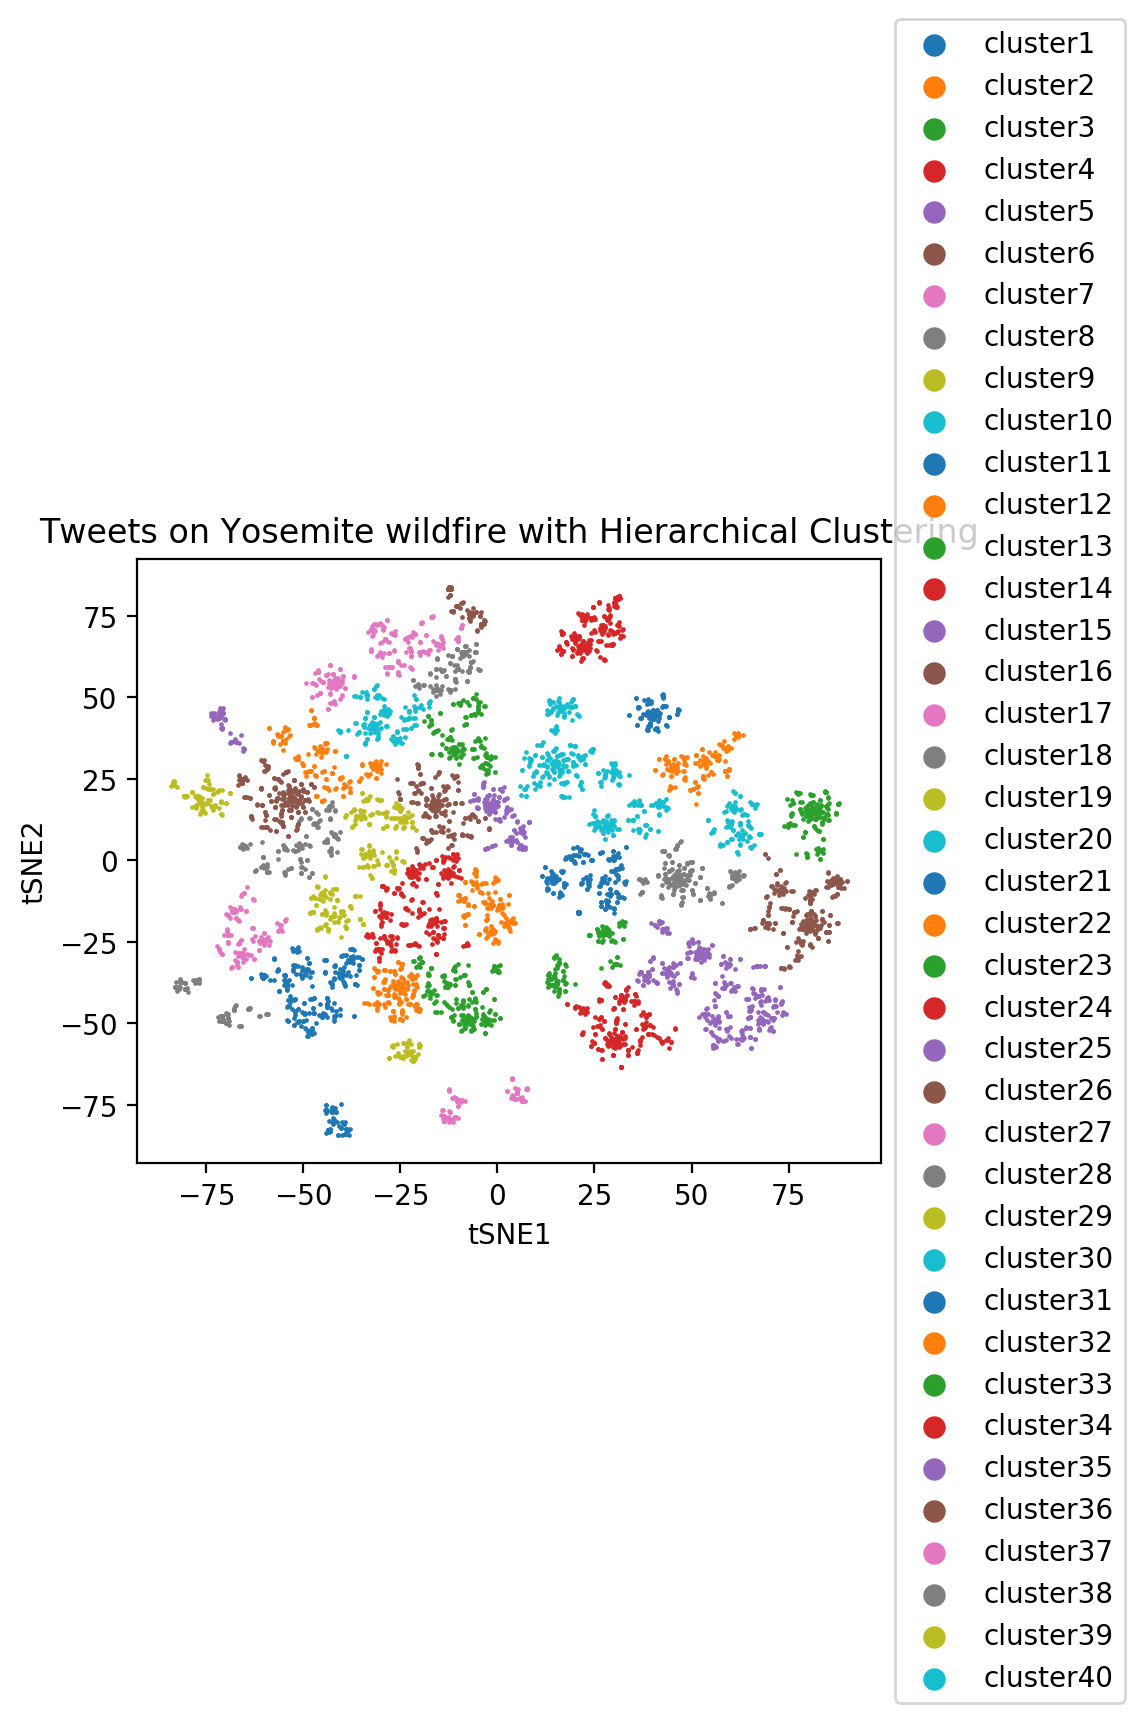

In [19]:
fig = plt.figure(dpi=200)
ax = plt.subplot(111)
for i, group in enumerate(groups):
    group = np.array(group)
    ax.scatter(group[:, 0], group[:, 1], label="cluster%d"%(i+1), s=0.5)
#ax.scatter(centers[:,0], centers[:,1], s=4, color="black", marker="x")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lgnd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, markerscale=10.)
ax.set_xlabel("tSNE1")
ax.set_ylabel("tSNE2")
plt.title("Tweets on Yosemite wildfire with Hierarchical Clustering")
plt.show()

In [21]:
for i in range(max(clusters)+1):
    print(i+1)
    topics = np.where(clusters==i)
    #print(topics)
    topics = topics[0]
    DC.showTopic(df1, topics, Nshow=3)
    print("-------------")

1
15
#Delhigangrape case: Family demands death for the accused - http://t.co/fvGPNDfoT7 Tue Sep 10 03:30:10 +0000 2013
delhigangrape case family demands death accused

50
@Locking_Chifunk Thanks for letting us know. Our team is working diligently to fix it. Keep checking http://t.co/2QaMrJtC5G for updates. ^AG Tue Sep 10 03:53:03 +0000 2013
locking_chifunk thanks letting us know team working diligently fix keep checking

72
Join us on http://t.co/R1Lq313rMv for our coverage of the Delhi gang rape trial verdict Tue Sep 10 04:06:01 +0000 2013
join us

73
#Delhigangrape: 9 months on, time for justice - http://t.co/RyqwIP7xVy Tue Sep 10 04:05:04 +0000 2013
delhigangrape months time justice

-------------
2
20
#Russia's proposal on chemical weapons just might resolve #Syria face-off, writes Amos Harel. http://t.co/a9W22841rf Tue Sep 10 03:33:15 +0000 2013
russia proposal chemical weapons might resolve syria face writes amos harel

56
"Russia urged Syria to place its chemical weapons under i